In [1]:
#viola jones algo can detect objects faces with high accuracy used for face eye smile

In [29]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy

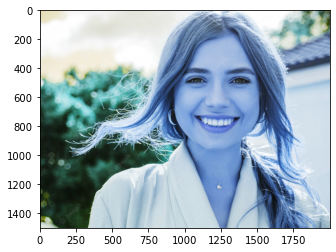

In [3]:
image1 = cv2.imread("smilemore.jpg")
plt.imshow(image1)
plt.imshow(image1,cmap="gray")


In [4]:
#detecting the whole face
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [5]:
#once face is deetected create a rectangle around the face so we need x and y compoinents of the face
def detect_face(image):
    face_image = image.copy()
    face_rectangle = face_detector.detectMultiScale(face_image)
    for(x,y,width,height) in face_rectangle:
        cv2.rectangle(face_image,(x,y),(x+width,y+height),(255,255,255),8)
    return face_image

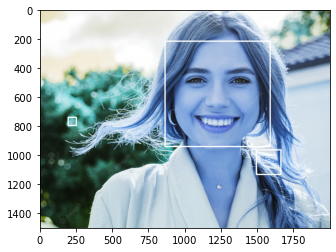

In [6]:
detection_Result = detect_face(image1)
plt.imshow(detection_Result,cmap = "gray")

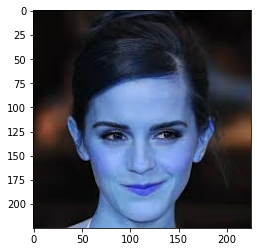

In [16]:
image2 = cv2.imread("emma.jfif")
plt.imshow(image2)
plt.imshow(image2,cmap="gray")


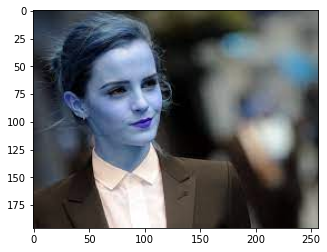

In [17]:
image3 = cv2.imread("watson.jfif")
plt.imshow(image3)
plt.imshow(image3,cmap="gray")

In [8]:
def detect_face(image):
    face_image = image.copy()
    face_rectangle = face_detector.detectMultiScale(face_image)
    for(x,y,width,height) in face_rectangle:
            cv2.rectangle(face_image,(x,y),(x+width,y+height),(255,255,255),8)
    return face_image

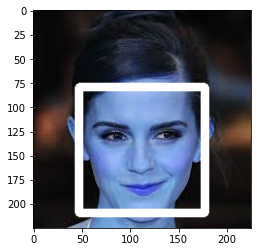

In [9]:
detection_result = detect_face(image2)
plt.imshow(detection_result,cmap = "gray")

In [10]:
#deetcting eyes

eye_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
def detect_eye(image):
    face_image = image.copy()
    face_rectangle = eye_detector.detectMultiScale(face_image)
    for(x,y,width,height) in face_rectangle:
        cv2.rectangle(face_image,(x,y),(x+width,y+height),(255,255,255),8)
    return face_image

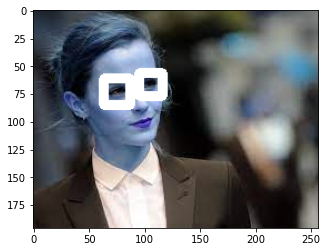

In [23]:
detection_result = detect_eye(image3)
plt.imshow(detection_result,cmap="gray")

In [28]:
#smile detetctoion
#smile_detector = cv2.CascadeClassifier('haarcascade_smile.xml')
#smile_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
smile_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

In [29]:
def detect_smile(image):
    face_image = image.copy()
    face_rectangle = smile_detector.detectMultiScale(face_image)
    for(x,y,width,height) in face_rectangle:
        cv2.rectangle(face_image,(x,y),(x+width,y+height),(255,255,255),8)
    return face_image

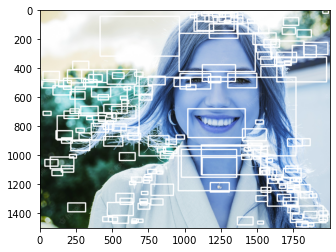

In [33]:
detection_result = detect_smile(image1)
plt.imshow(detection_result,cmap="gray")

In [17]:
#sentiiment anaysis is a means to identify the view or the emotion of the situation
#and find the emotion/intent behind a piece of tetx or speech or any mode of communication

In [ ]:
#this burger has bad taste - negative review
#i love this chicken sandwich  - posotive review


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#NLTK nlp toolkit
#stopwords dont provide meaning to a sentence
#WordNetLennatizer it is used to convert different forms of words into a single itnem but still kee the cintext intct

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
#scikit leanr package

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve
from sklearn.metrics import classification_report, plot_confusion_matrix

In [7]:
df_train= pd.read_csv("./testset1.txt",delimiter=";",names=['text','label'])
df_val=pd.read_csv("./testset1.txt",delimiter=';',names=['text','label'])

df_train.dropna(inplace=True)
df_val.dropna(inplace=True)

In [8]:
df=pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop=True)

In [9]:
print("shape of data frame: ",df.shape)
df.sample(5)

shape of data frame:  (62, 2)


,text,label
47,@ims What is AT&amp,T fucking up?
49,Obama's got JOKES!! haha just got to watch a b...,)
37,F*ck Time Warner Cable!!! You f*cking suck bal...,my damn HD channels hardly ever come in. Bull...
18,Obama's got JOKES!! haha just got to watch a b...,)
44,@Mbjthegreat i really dont want AT&amp,T phone service..they suck when it comes to ha...


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

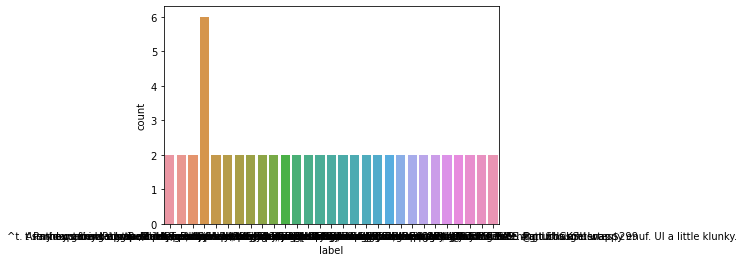

In [10]:
sns.countplot(df.label)


In [11]:
def custom_encoder(df):
    df.replace(to_replace="surprise", value=1, inplace=True)
    df.replace(to_replace="love",value=1,inplace=True)
    df.replace(to_replace="joy",value=1,inplace=True)
    df.replace(to_replace="fear",value=0,inplace=True)
    df.replace(to_replace="anger",value=0,inplace=True)
    df.replace(to_replace="sadness",value=0,inplace=True)
    
                   

In [12]:
custom_encoder(df['label'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

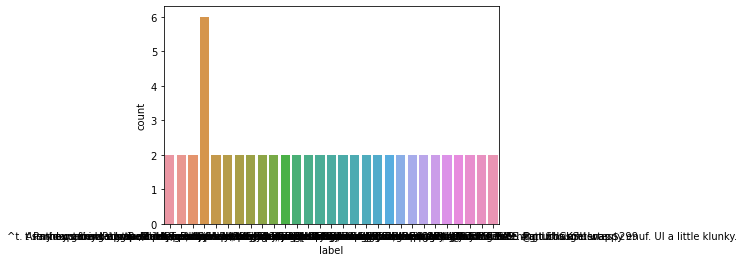

In [13]:
sns.countplot(df.label)

In [14]:
#dara preprocessing
#first we williterate and get rid of any charac other than alphabetrs
#then we will convert string to lowercases
#check for stop words nad get rid of them like a a n athe is was
#then we will perform lametization
#finally it will reurn a corpus of processed data

In [15]:
#object for wordnetlemmatizer
ln = WordNetLemmatizer()


In [16]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]','',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [ln.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [18]:
corpus = text_transformation(df['text'])

In [19]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

In [20]:
#tune hypoerpparamet4r using grid search CV


In [21]:
parameters = {'max_features':('auto','sqrt'),
              "n_estimators":[5,10],
              'max_depth':[10,None],
             'min_samples_split':[5],
             'min_samples_leaf':[1],
             'bootstrap':[True]
             }


In [22]:
grid_search= GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [23]:
#now we fit the data into grid search and view the best paramters using the best_params attribute
# from sklearn.model_selection import GridSearchCV

In [151]:
#and we can view all the models and their respective parameters which ismean test sciore and rank as fridsearchCv
for i in range(8):
    print('parameters:',grid_search.cv_results_['params'][i])
    print('Mean test score: ' ,grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
Mean test score:  0.6102564102564103
Rank:  8
parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Mean test score:  0.8679487179487181
Rank:  5
parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
Mean test score:  0.7102564102564103
Rank:  7
parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Mean test score:  0.8358974358974359
Rank:  6
parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
Mean test score:  0.9679487179487178
Rank:  4
parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'aut

In [38]:
#creating a final random forest
rfc = RandomForestClassifier(max_features = grid_search.best_params_['max_features'],
max_depth = grid_search.best_params_['max_features'],
n_estimators = grid_search.best_params_['max_features'],
min_samples_split = grid_search.best_params_['min_samples_split'],
min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
bootstrap = grid_search.best_params_['bootstrap']
)

In [46]:
#test dT TRANSFORMATIOM
test_df = pd.read_csv('testset1.txt',delimiter=';',names = ['text','label'])
print(test_df.text)


0      @stellargirl I loooooooovvvvvveee my Kindle2. ...
1      Reading my kindle2...  Love it... Lee childs i...
2      Ok, first assesment of the #kindle2 ...it fuck...
3      @kenburbary You'll love your Kindle2. I've had...
4      @mikefish  Fair enough. But i have the Kindle2...
                             ...                        
493    Ask Programming: LaTeX or InDesign?: submitted...
494    On that note, I hate Word. I hate Pages. I hat...
495    Ahhh... back in a *real* text editing environm...
496    Trouble in Iran, I see. Hmm. Iran. Iran so far...
497    Reading the tweets coming out of Iran... The w...
Name: text, Length: 498, dtype: object


In [47]:
rfc = RandomForestClassifier()
X_test, y_test = test_df.text, test_df.label
test_df = custom_encoder(y_test)
test_corpus = text_transformation(X_test)
testdata=cv.transform(test_corpus)
predicitions = grid_search.best_estimator_.rfc.predict(testdata)

AttributeError: 'RandomForestClassifier' object has no attribute 'rfc'

In [175]:
#model evLUATIOM'
#we wukk evaluate our our model using varuoius metrcs such as accuacy score precision score recall score
#confusion marec and create a ROC curve to visualize how our model performed
acc_score = accuracy_score(y_test,predictions)
pre_Score = precision_score(y_Test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy score:', acc_Score)
rint('precision score: ',pre_score)
print('recall score: ',rec_Score)
print("."*50)
cr = classification_report(y_test,predicitons)
print(cr)

NameError: name 'predictions' is not defined

In [32]:
predictions_probabiltiy = rfc.predict_proba(testdata)
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('roc curve')
plt.xlabel('fase positive rate')
plt.ylabel('true positive rate')
plt.show()

NameError: name 'rfc' is not defined

In [33]:
#our models has claassified the sentiments with accuracy score precisonnow we will check forcustom input and let our moel identify it


In [34]:
def expression_check(prediciton_input):
    if prediciton_input ==0:
        print("iNPUT STATEMENT HAS NEGATIVE SENTI")
    elif perdiction_input ==1 :
        print("input is statement is positive setniment")
    else:
        print("inavlid statement")
    

In [35]:
#function to take th einput statement and oerfor same tranformation as we did earlier

def sentiment_predictorr(input):
    input= text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rf.predict(transformed_input)
    expression_check(prediction)
    

In [37]:
input1 = [' Sometimes i justd ont want ot go out']
input2 = ["i love to go out wiyth u"]
